In [0]:
%matplotlib inline

import torch
import torchvision
import numpy as np

np.seterr(all='raise')

{'divide': 'raise', 'invalid': 'raise', 'over': 'raise', 'under': 'raise'}

In [0]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(classes[0])

plane


In [0]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [0]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

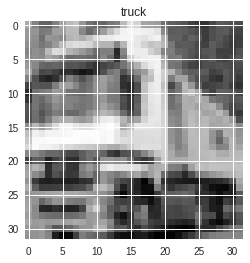

In [0]:
# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 1
label = grayscale_dataset_train[image_index][1]
npimg = grayscale_dataset_train[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [0]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?
bias = 1
linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_img = np.append(linear_img, bias)
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_img = np.append(linear_img, bias)
    linear_dataset_test.append((linear_img,label))    

In [0]:
size = len(linear_dataset_train[0][0])
print(size)

1025


# Definindo o perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
  O = np.dot(inputs.T, weights.T)
  Y = sigmoid(O)
  return Y;

# Treinando o perceptron

In [0]:
#Acurácia
def evaluate(weights,dataset):
    erro_total = 0
    for img,label in dataset:
        y = perceptron(img, weights)
        erro = abs(labels - y)
        if(erro < 0.5):
           erro = 0
        else:
           erro = 1
        erro_total += erro
    return 100 - ((erro_total * 100) / len(dataset))

In [0]:
# Inicialização e Treinamento
weights = (np.random.rand(1,size) - 0.5)[0]

neta = 0.000001
np.random.shuffle(linear_dataset_train)
np.random.shuffle(linear_dataset_test)

accuracies = []
i = 0
print('Treinamento!')
for epoch in range(100):
  for img,labels in linear_dataset_train[0:30000]:
    y = perceptron(img, weights)
    erro = labels - y
    weights += erro * neta * img * (1 - img)
    
  if((epoch%10) == 0):
    accuracies = np.append(accuracies, evaluate(weights, linear_dataset_train[30000:]))
    print('[{}] Taxa de acerto: {}%'.format(i, accuracies[i]))
    i += 1
 

Treinamento!
[0] Taxa de acerto: 97.975%
[1] Taxa de acerto: 68.23%
[2] Taxa de acerto: 64.8%
[3] Taxa de acerto: 64.74000000000001%
[4] Taxa de acerto: 64.765%
[5] Taxa de acerto: 64.84%
[6] Taxa de acerto: 64.93%
[7] Taxa de acerto: 65.0%
[8] Taxa de acerto: 65.075%
[9] Taxa de acerto: 65.14%


In [0]:
#Teste

acc = evaluate(weights, linear_dataset_test)
print('Teste! \nTaxa de acerto: {}%'.format(acc))

Teste! 
Taxa de acerto: 65.5%


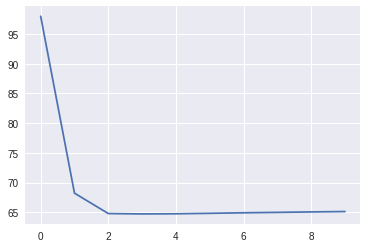

In [0]:
# Caso queiram plotar alguma coisa

import matplotlib.pyplot as plt
plt.plot(accuracies)

# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?

In [0]:
def dataset_train(i, dataset):
  bias = 1
  linear_dataset_train = []
  for img,category in dataset:
      linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
      if (category == classes[i]):
        label = 1
      else:
        label = 0
      linear_img = np.append(linear_img, bias)
      linear_dataset_train.append((linear_img,label))
  return linear_dataset_train

In [0]:
def dataset_test(i, dataset):
  bias = 1    
  linear_dataset_test = []
  for img,category in dataset:
      linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
      if (category == classes[i]):
        label = 1
      else:
        label = 0
      linear_img = np.append(linear_img, bias)
      linear_dataset_test.append((linear_img,label))
  return linear_dataset_test

In [0]:
j = 0
weights = []
for i in range(10):
  linear_dataset_train = dataset_train(i, grayscale_dataset_train)
  linear_dataset_test = dataset_test(i, grayscale_dataset_test)
  
  # Inicialização
  print("Classe: {}".format(classes[i]))
  weight = (np.random.rand(1,size) - 0.5)[0]

  neta = 0.000001
  np.random.shuffle(linear_dataset_train)
  np.random.shuffle(linear_dataset_test)

  accuracies = []
  k = 0
  for epoch in range(100):
    for img,labels in linear_dataset_train[0:30000]:
      y = perceptron(img, weight)
      erro = labels - y
      weight += erro * neta * img * (1 - img)
    
    if((epoch%10) == 0):
      accuracies = np.append(accuracies, evaluate(weight, linear_dataset_train[30000:]))
      print('\tTaxa de acerto: {}%'.format(accuracies[k]))
      k += 1
  weights.append(weight)
  acc = evaluate(weight, linear_dataset_test)
  print('Teste Final: {}%'.format(acc))

Classe: plane
	Taxa de acerto: 87.185%
	Taxa de acerto: 94.095%
	Taxa de acerto: 94.74%
	Taxa de acerto: 94.905%
	Taxa de acerto: 94.94%
	Taxa de acerto: 94.985%
	Taxa de acerto: 95.01%
	Taxa de acerto: 95.025%
	Taxa de acerto: 95.045%
	Taxa de acerto: 95.04%
Teste Final: 95.22%
Classe: car
	Taxa de acerto: 58.655%
	Taxa de acerto: 95.12%
	Taxa de acerto: 96.185%
	Taxa de acerto: 96.34%
	Taxa de acerto: 96.375%
	Taxa de acerto: 96.39%
	Taxa de acerto: 96.37%
	Taxa de acerto: 96.39%
	Taxa de acerto: 96.39%
	Taxa de acerto: 96.41%
Teste Final: 96.78%
Classe: bird
	Taxa de acerto: 95.23%
	Taxa de acerto: 93.97%
	Taxa de acerto: 93.68%
	Taxa de acerto: 93.62%
	Taxa de acerto: 93.575%
	Taxa de acerto: 93.615%
	Taxa de acerto: 93.595%
	Taxa de acerto: 93.57%
	Taxa de acerto: 93.54%
	Taxa de acerto: 93.51%
Teste Final: 94.2%
Classe: cat
	Taxa de acerto: 27.405%
	Taxa de acerto: 94.995%
	Taxa de acerto: 96.325%
	Taxa de acerto: 96.535%
	Taxa de acerto: 96.57%
	Taxa de acerto: 96.585%
	Taxa de 

In [0]:
def dataset_test_final(dataset):
  bias = 1    
  linear_dataset_test = []
  for img,category in dataset:
      linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
      linear_img = np.append(linear_img, bias)
      linear_dataset_test.append((linear_img,category))
  return linear_dataset_test

In [0]:
def resultado(i):
  if(i == 0):
    return 'plane'
  elif(i == 1):
    return 'car'
  elif(i == 2):
    return 'bird'
  elif(i == 3):
    return 'cat'
  elif(i == 4):
    return 'deer'
  elif(i == 5):
    return 'dog'
  elif(i == 6):
    return 'frog'
  elif(i == 7):
    return 'horse'
  elif(i == 8):
    return 'ship'
  elif(i == 9):
    return 'truck'

In [0]:
acerto = 0
dataset_final = dataset_test_final(grayscale_dataset_test)
np.random.shuffle(dataset_final)
for img, label in dataset_final:
  maior = 0
  for i in range(10):
    y = perceptron(img, weights[i])
    #print('Y: {}   N: {}'.format(y, maior))
    if(y > maior):
      maior = y
      n = i
  classe = resultado(n)
  if(classe == label):
    acerto = acerto + 1
  #print('Esperado: {}    Recebido: {}'.format(label, classe))

print('Acertos: {}%'.format((acerto*100)/len(dataset_final)))

Acertos: 8.77%
